In [60]:
# UNEMPLOYMENT ANALYSIS WITH PYTHON
# Unemployment rate - no. of people who are unemployed as of % of total labour force

In [61]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [62]:
dt = pd.read_csv("/content/sample_data/Unemployment_Rate_upto_11_2020.csv")
dt_ = pd.read_csv("/content/sample_data/Unemployment in India.csv")

In [63]:
print(dt.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [64]:
#CHECK FOR NULL VALUES
print(dt.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [65]:
dt.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [66]:
#Renaming columns
dt.columns = ["States", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed",
              "Estimated Labour Participation Rate", "Region",
              "longitude", "latitude"]


In [67]:
display(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


None

In [68]:
dt.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [69]:
# Dimensions
dt.shape

(267, 9)

In [70]:
dt.duplicated().any()

False

In [71]:
dt.States.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: States, dtype: int64

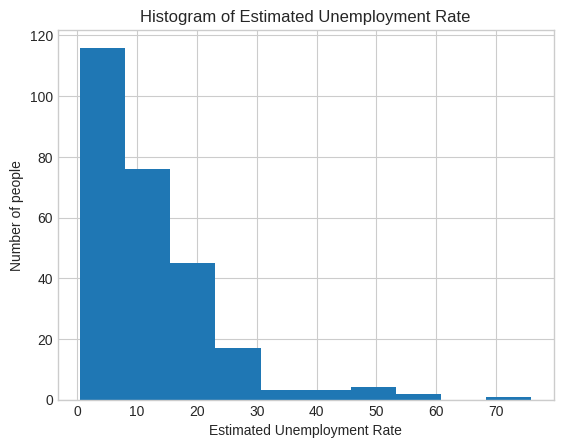

In [74]:
# HISTOGRAM
estimated_unemployment_rate = dt['Estimated Unemployment Rate']
plt.hist(estimated_unemployment_rate)
plt.xlabel('Estimated Unemployment Rate')
plt.ylabel('Number of people')
plt.title('Histogram of Estimated Unemployment Rate')
plt.show()

In [75]:
import calendar
dt['Date'] = pd.to_datetime(dt['Date'],dayfirst = True)
dt['Month'] = dt['Date'].dt.month
dt['MonthNumber'] = dt['Month'].apply(lambda x : int(x))
dt['MonthName'] =  dt['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [105]:
display(dt.info())
#Displaying new defined columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   Month                                267 non-null    int64         
 10  MonthNumber   

None

In [ ]:
#CORRELATION MATRIX

<ipython-input-95-9b46f79e60e8>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



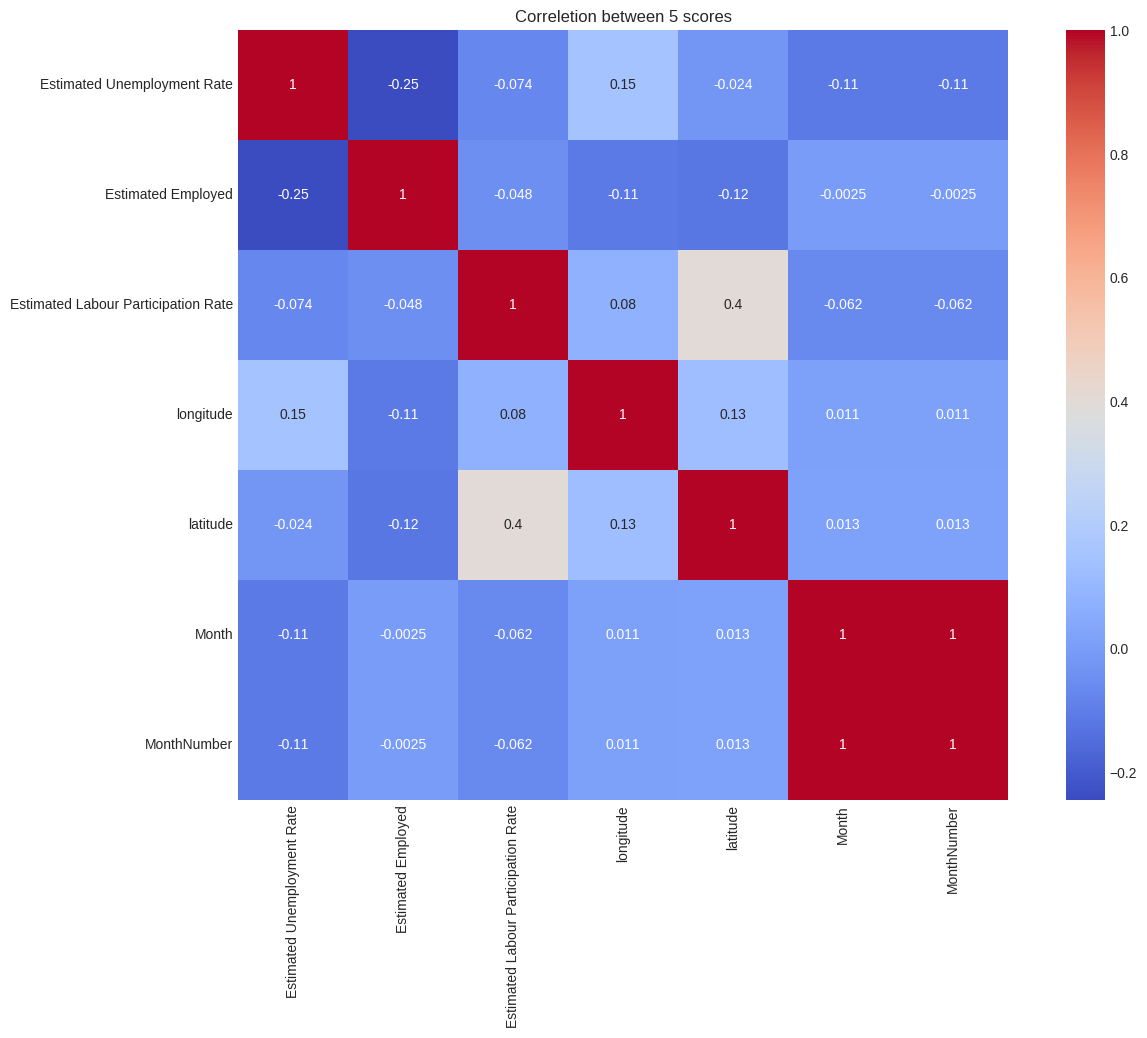

In [ ]:
plt.figure(figsize=(15,10))
corr=dt.corr()
sns.heatmap(corr,annot=True,square=True,cmap="coolwarm")
plt.title("Correletion between 5 scores")
plt.yticks(rotation=0)
plt.show()

In [ ]:
# FROM CORRELATION MATRIX -
# The estimated unemployment rate has a negative correlation with the number of people employed.
# There is a weak positive correlation between the estimated unemployment rate and the latitude.
# There is no significant correlation between the estimated unemployment rate and the longitude.

In [76]:
# STATE ANALYSIS
States = dt.groupby(['States']).agg({'Estimated Unemployment Rate': 'mean', 'Estimated Employed': 'mean', 'Estimated Labour Participation Rate': 'mean'})
# Create a new DataFrame with the data you want to plot
df = pd.DataFrame({'States': dt['States'], 'Estimated Unemployment Rate': dt['Estimated Unemployment Rate']})
# Bar chart of the estimated unemployment rate for each state
fig = px.bar(df, x='States', y='Estimated Unemployment Rate', color='States', title='Average unemployment rate (State)')
# Descending order
fig.update_layout(xaxis={'categoryorder':'total descending'})
# Show the plot
fig.show()

In [79]:
# Grouping by 'Region' and finding mean values for the numerical columns
regionStats = dt.groupby(['Region'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

# Rounding the values to 2 decimal points
round(regionStats,2)

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


In [96]:
# Unemployment rate in Indian States by region
unemployment_state_byregion = dt[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment_state_byregion, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in Indian States by region")
figure.show()

In [81]:
fig=px.bar(dt,x="States",y="Estimated Unemployment Rate",color="States",hover_data=["States"],animation_frame="MonthName",
           title="Which month is highest Estimated Unemployment Rate with States")
fig.show()

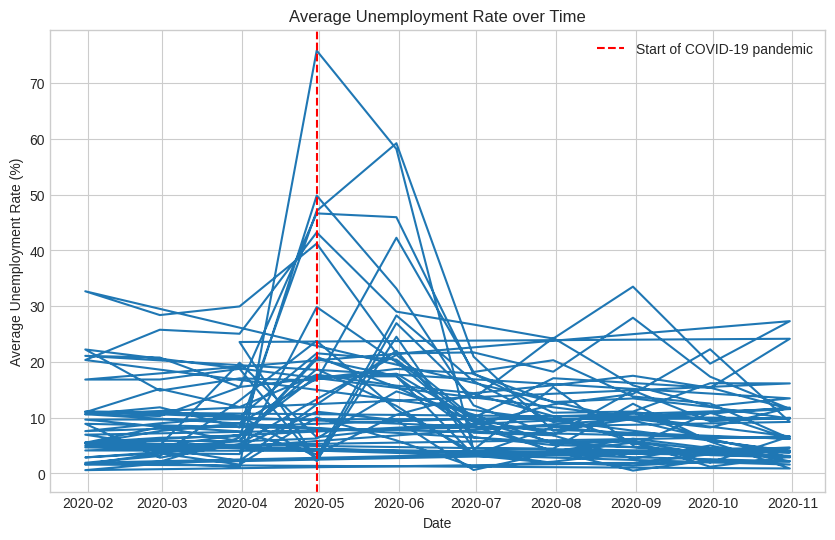

In [ ]:
# ----------------------IMPACT OF COVID-19------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Convert the 'Date' column to a datetime object
dt['Date'] = pd.to_datetime(dt['Date'], dayfirst=True)

# Create a new column for the month
dt['Month'] = dt['Date'].dt.month

# Calculate the start of the COVID-19 pandemic at the 4th month of the year
start_of_covid_pandemic = dt[dt['Month'] == 4]['Date'].min()

# Create a line plot of the average unemployment rate by year
plt.figure(figsize=(10, 6))
plt.plot(dt['Date'], dt['Estimated Unemployment Rate'])

# Add a vertical line to mark the start of the COVID-19 pandemic at the 4th month of the year
plt.axvline(x=start_of_covid_pandemic, color='red', linestyle='--', label='Start of COVID-19 pandemic')

# Set the title and labels
plt.title('Average Unemployment Rate over Time')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')

# Add a legend
plt.legend()

# Show the plot
plt.show()
